In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [3]:
#Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Data Preparation
# Merge customers with their transaction history
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [7]:
# Merge with customer data
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left')

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Fill NaN values with 0 for customers with no transactions
customer_data['TotalValue'].fillna(0, inplace=True)
customer_data['Quantity'].fillna(0, inplace=True)

In [15]:
# Feature Engineering
# Select relevant features for clustering
features = customer_data[['TotalValue', 'Quantity']]

In [17]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
# Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
db_indices = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
    db_indices.append(db_index)

Text(0, 0.5, 'Inertia')

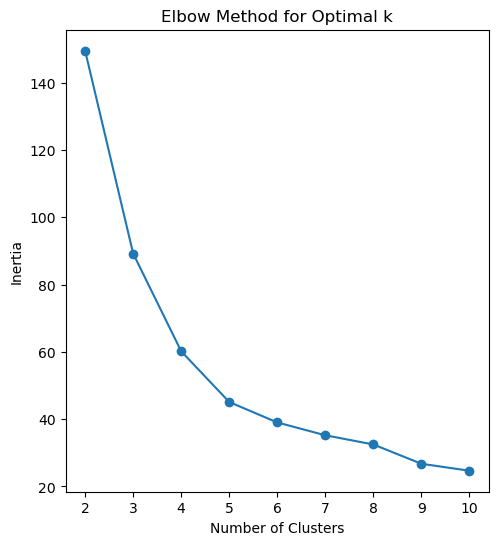

In [21]:
# Plot the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

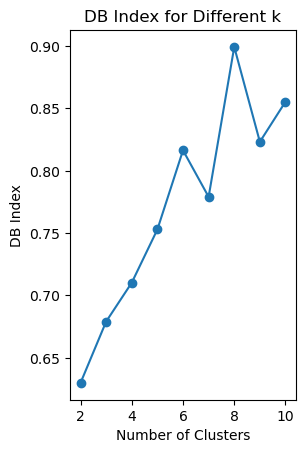

In [23]:
# Plot DB Index
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('DB Index for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [25]:
# Choose the optimal number of clusters (based on elbow method and DB index)
optimal_clusters = 4  # This can be adjusted based on the plots

In [27]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

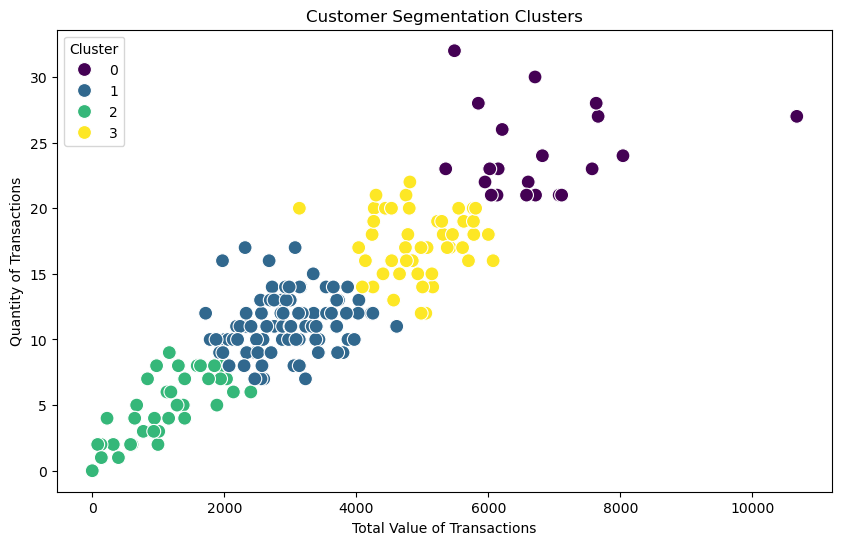

In [29]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value of Transactions')
plt.ylabel('Quantity of Transactions')
plt.legend(title='Cluster')
plt.show()

In [31]:
# Reporting
db_index_value = db_indices[optimal_clusters - 2]  # Get the DB Index for the optimal clusters
print(f"Number of Clusters Formed: {optimal_clusters}")
print(f"Davies-Bouldin Index Value: {db_index_value:.4f}")

Number of Clusters Formed: 4
Davies-Bouldin Index Value: 0.7103
